In [1]:
import numpy as np
import h5py
import os

import matplotlib.pyplot as plt

from helpers import build_experiment_name

%matplotlib inline

In [2]:
# path where the models are
#SAVEPATH  = '/Tmp/larocste/cortical_layers'
LOADPATH = "/data/lisatmp4/larocste/cortical_layers"
dataset='cortical_layers'


In [3]:
# with np.load(LOADPATH) as f:
#     param_values = [f['arr_%d' % i] for i in range(len(f.files))]

In [8]:
def plot(exp_name, path = LOADPATH, best_or_last = 'last',dataset = dataset):
    
    
    #Define path
    exp_path = os.path.join(path, dataset, exp_name)

    last = 'fcn1D_errors_last.npz'
    best = 'fcn1D_errors_best.npz'
    
    if best_or_last == 'last':
        err_plot = np.load(os.path.join(exp_path, last))
    elif best_or_last == 'best':
        err_plot = np.load(os.path.join(exp_path, best))
    else:
        raise ValueError('Best or last experiment?')
    
    #Extract errors and accuracy for training and validation
    try:
        err_train = err_plot['arr_1']
        err_val = err_plot['arr_0']
        acc_val = err_plot['arr_2']
        jacc_val =err_plot['arr_3']
    except Exception:
        err_train = err_plot['err_train']
        acc_train = err_plot['acc_train']
        err_val = err_plot['err_valid']
        acc_val = err_plot['acc_valid']
        jacc_val =err_plot['jacc_valid']     
    max_epoch = len(err_train)
    print 'n_epochs = ' + str(max_epoch)
    epochs = range(max_epoch)


    # Plot data
    plt.plot(epochs, err_train, 'r', label='train err ({:.3f})'.format(np.min(err_train)))
    plt.plot(epochs, err_val, 'g', label='val err ({:.3f})'.format(np.min(err_val)))
    #plt.ylim((0,2))

    # Add legend
    plt.legend()

    # Add title
    plt.title(exp_name)
    plt.xlabel('Epoch')
    plt.ylabel('Error')

    plt.figure()
    try:
        plt.plot(epochs, acc_train, 'red', label='acc train ({:.3f})'.format(np.max(acc_val)))
    except Exception:
        pass
    plt.plot(epochs, acc_val, 'b', label='acc val ({:.3f})'.format(np.max(acc_val)))
    plt.plot(epochs, jacc_val, 'black', label = 'jacc val ({:.3f})'.format(np.max(acc_val)))
    

    # Add legend
    plt.legend()

    # Add title
    plt.title(exp_name)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.figure()

    print('TRAIN: ' + str(err_train.min()))
    print('VALID: ' + str(err_val.min()))

In [9]:
exp_name = 'fcn1D_dataugm_[3, 3, 3]_64filt_batchs=[1000, 1000, 1]_botconv=2_lrate=0.0001_pat=25_merge=concat_fsize=5_psize=2_noshuffle10batch'
exp_name = 'fcn1D_dataugm_[3, 3, 3]_64filt_batchs=[2000, 2000, 1]_botconv=2_lrate=0.001_pat=25_merge=concat_fsize=3_psize=2_noshuffle10batch'

#exp_name = 'simple_model_lrate=0.0005_fil=64_fsizes=[7, 15, 25, 49]_depth=4_raw_decay=0.001_pat=25'

n_epochs = 176
TRAIN: 1.43064593851
VALID: 1.43350000815


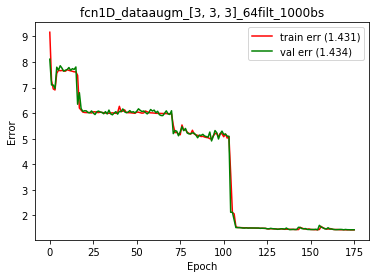

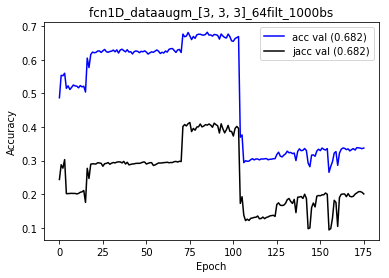

In [10]:
exp_name = 'fcn1D_dataaugm_[3, 3, 3]_64filt_1000bs'
plot(exp_name, LOADPATH, best_or_last='last')

n_epochs = 176
TRAIN: 1.43064593851
VALID: 1.43350000815


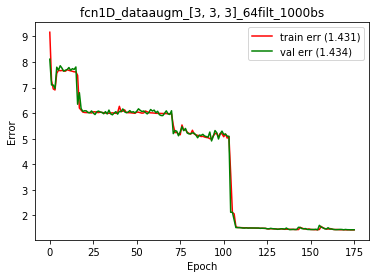

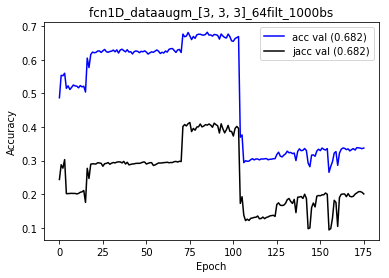

In [7]:
exp_name = 'fcn1D_dataaugm_[3, 3, 3]_64filt_1000bs'
plot(exp_name, LOADPATH, best_or_last='last')

n_epochs = 100
TRAIN: 2.04191875458
VALID: 0.843564867973
n_epochs = 42
TRAIN: 1.95742964745
VALID: 0.410822719336
n_epochs = 26
TRAIN: 0.999778091908
VALID: 0.749915778637
n_epochs = 10
TRAIN: 0.910707771778
VALID: 0.531965732574
n_epochs = 10
TRAIN: 1.86327695847
VALID: 29.4874744415
n_epochs = 10
TRAIN: 3.83675074577
VALID: 3.28254318237
n_epochs = 100
TRAIN: 3.25172185898
VALID: 0.851466119289
n_epochs = 80
TRAIN: 0.519371352436
VALID: 0.480426823809
n_epochs = 110
TRAIN: 0.192251121004
VALID: 0.228777077226
n_epochs = 187
TRAIN: 0.355715843408
VALID: 0.241957971737
n_epochs = 30
TRAIN: 0.772707063901
VALID: 0.549494791599
n_epochs = 81
TRAIN: 0.568480962724
VALID: 0.420754465319
n_epochs = 32
TRAIN: 0.771527057154
VALID: 0.492956019583
n_epochs = 230
TRAIN: 0.400125436354
VALID: 0.266326955387
n_epochs = 96
TRAIN: 0.834634933555
VALID: 0.438123264483
n_epochs = 103
TRAIN: 0.490897994031
VALID: 0.3511697579
n_epochs = 36
TRAIN: 0.904029529346
VALID: 0.432674913179
n_epochs = 80
TRA

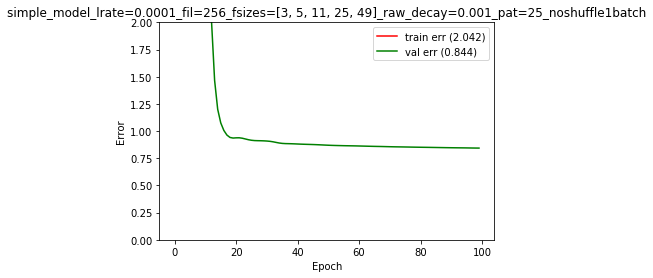

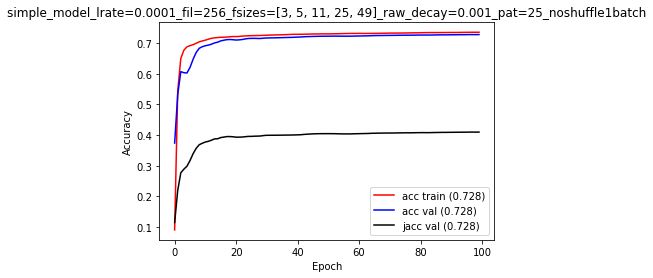

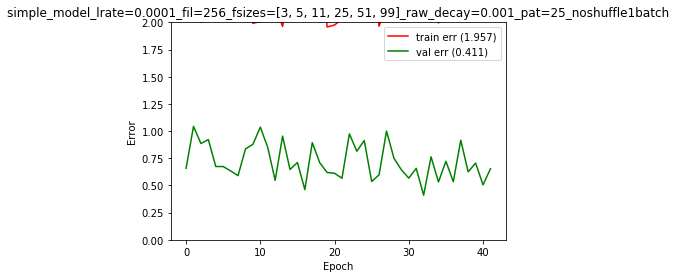

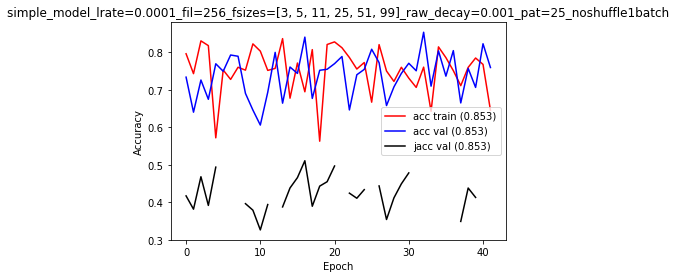

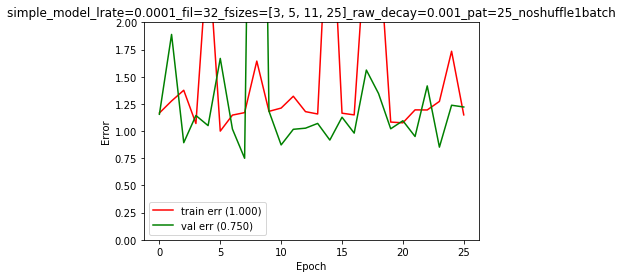

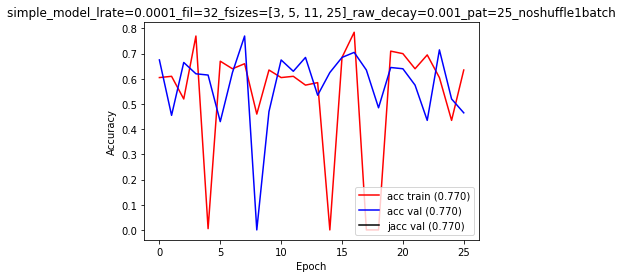

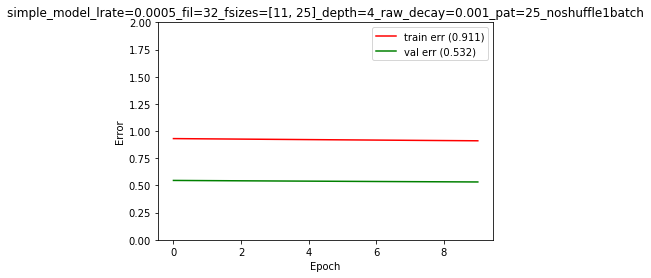

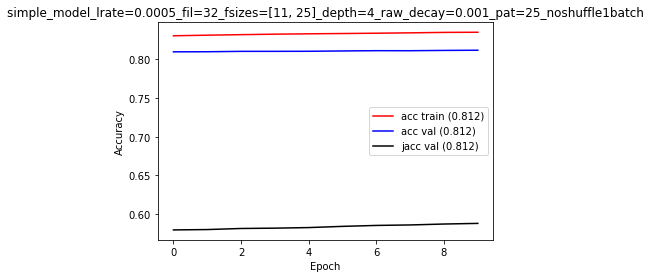

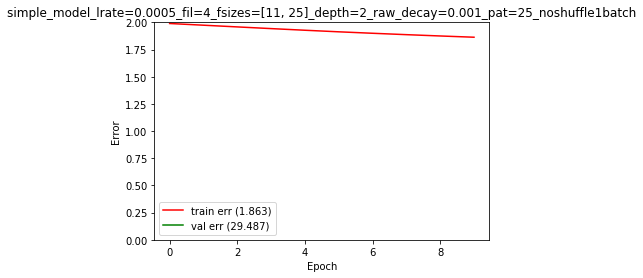

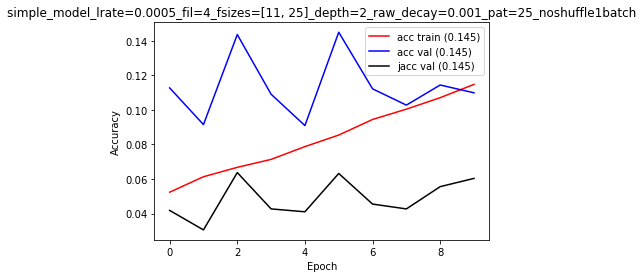

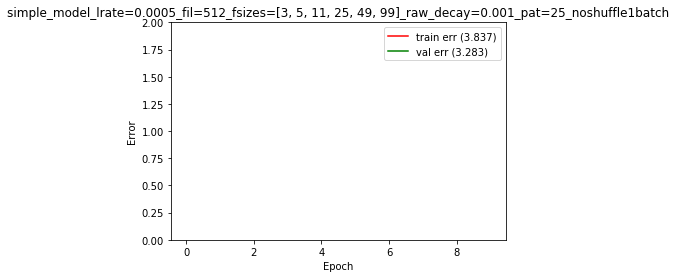

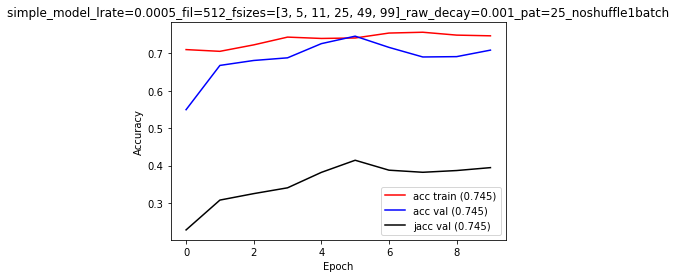

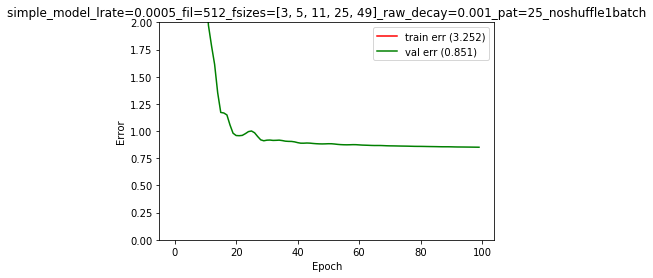

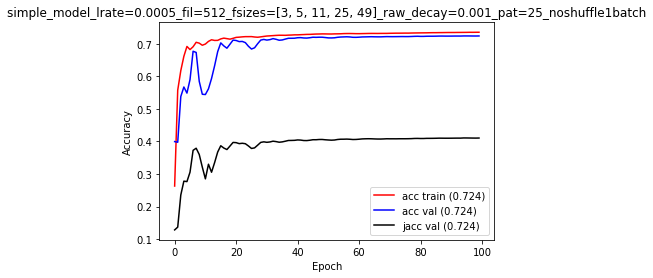

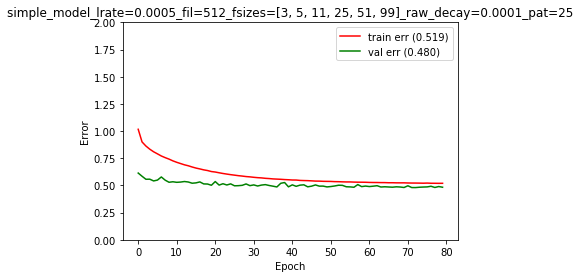

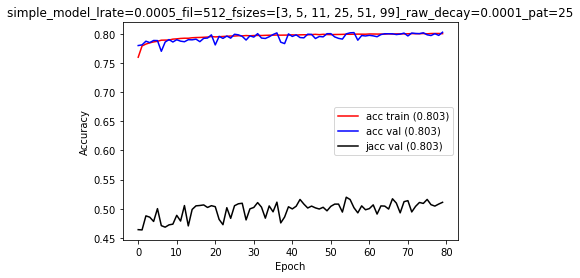

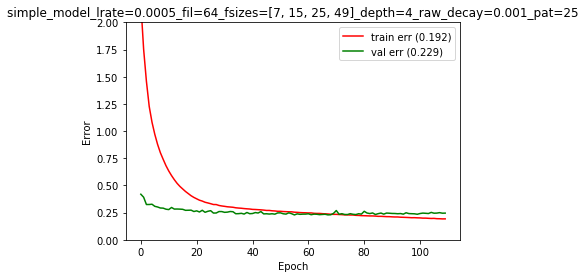

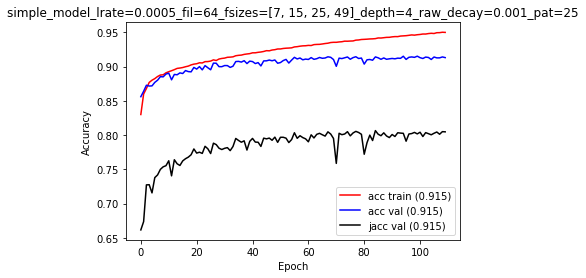

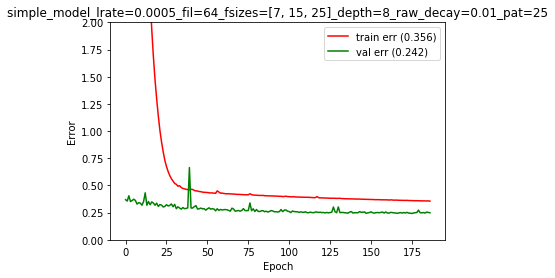

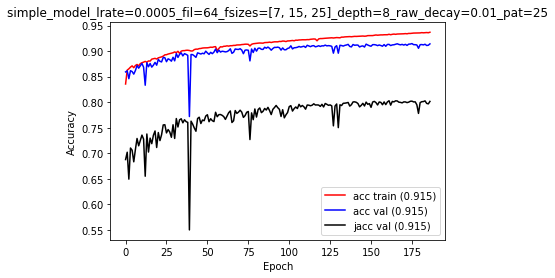

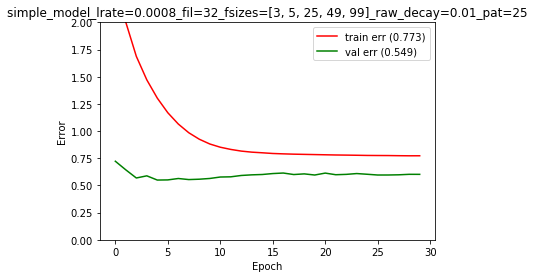

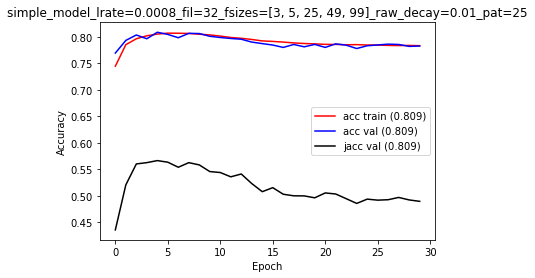

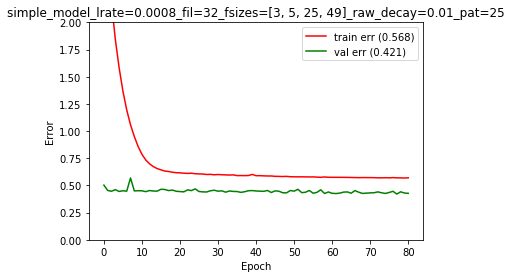

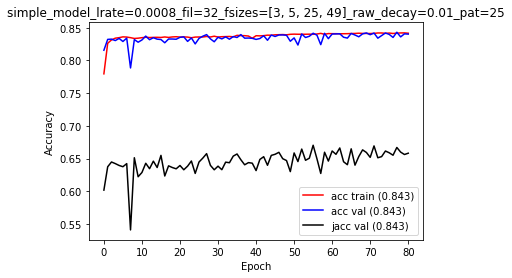

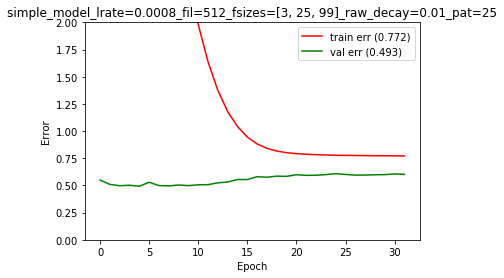

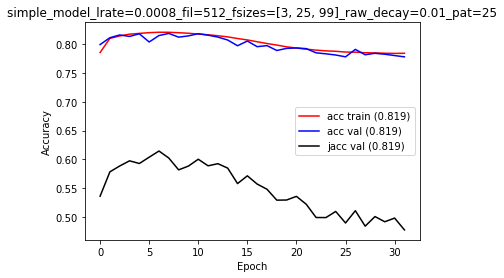

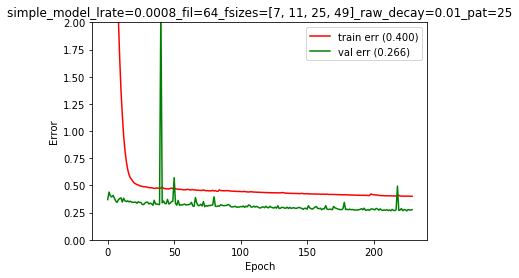

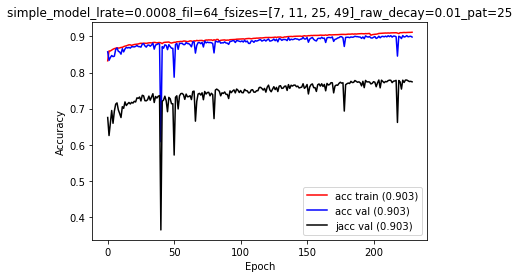

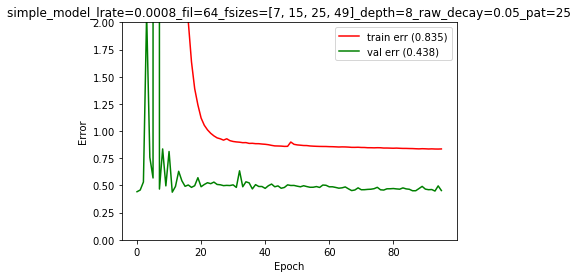

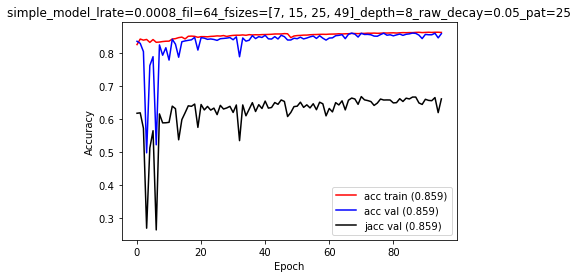

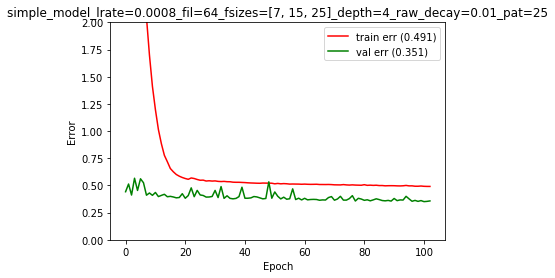

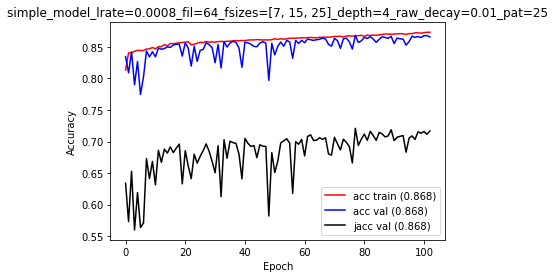

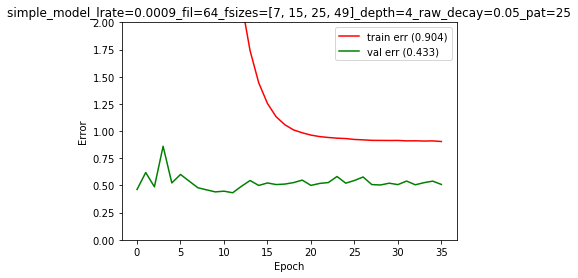

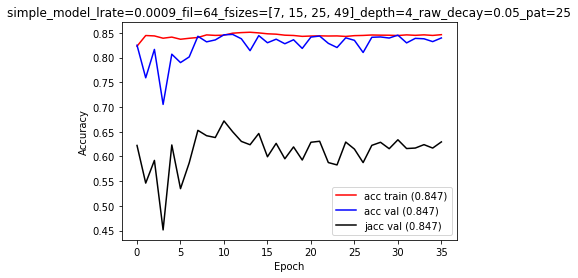

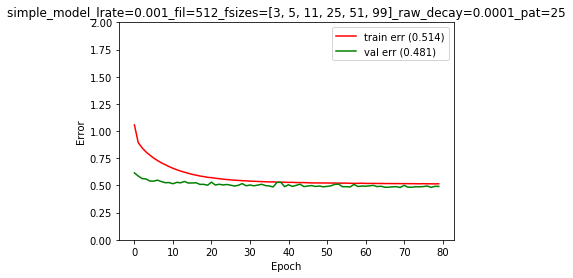

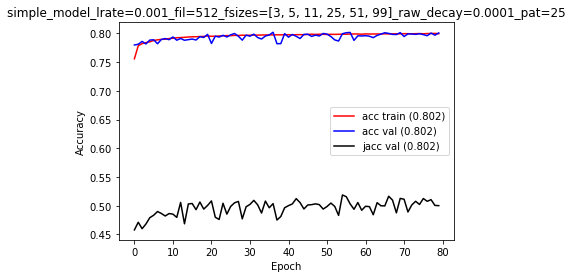

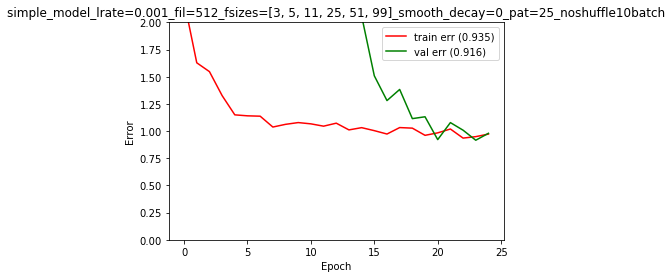

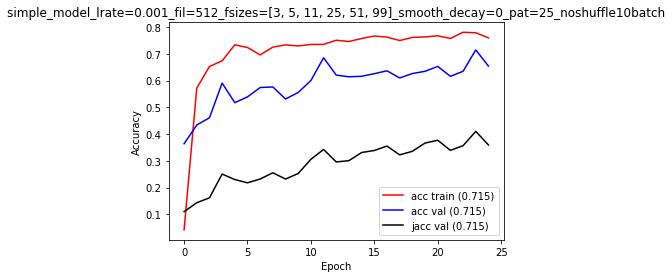

In [10]:
for exp in ['simple_model_lrate=0.0001_fil=256_fsizes=[3, 5, 11, 25, 49]_raw_decay=0.001_pat=25_noshuffle1batch',
'simple_model_lrate=0.0001_fil=256_fsizes=[3, 5, 11, 25, 51, 99]_raw_decay=0.001_pat=25_noshuffle1batch',
'simple_model_lrate=0.0001_fil=32_fsizes=[3, 5, 11, 25]_raw_decay=0.001_pat=25_noshuffle1batch',
'simple_model_lrate=0.0005_fil=32_fsizes=[11, 25]_depth=4_raw_decay=0.001_pat=25_noshuffle1batch',
'simple_model_lrate=0.0005_fil=4_fsizes=[11, 25]_depth=2_raw_decay=0.001_pat=25_noshuffle1batch',
'simple_model_lrate=0.0005_fil=512_fsizes=[3, 5, 11, 25, 49, 99]_raw_decay=0.001_pat=25_noshuffle1batch',
'simple_model_lrate=0.0005_fil=512_fsizes=[3, 5, 11, 25, 49]_raw_decay=0.001_pat=25_noshuffle1batch',
'simple_model_lrate=0.0005_fil=512_fsizes=[3, 5, 11, 25, 51, 99]_raw_decay=0.0001_pat=25',
'simple_model_lrate=0.0005_fil=64_fsizes=[7, 15, 25, 49]_depth=4_raw_decay=0.001_pat=25',
'simple_model_lrate=0.0005_fil=64_fsizes=[7, 15, 25]_depth=8_raw_decay=0.01_pat=25',
'simple_model_lrate=0.0008_fil=32_fsizes=[3, 5, 25, 49, 99]_raw_decay=0.01_pat=25',
'simple_model_lrate=0.0008_fil=32_fsizes=[3, 5, 25, 49]_raw_decay=0.01_pat=25',
'simple_model_lrate=0.0008_fil=512_fsizes=[3, 25, 99]_raw_decay=0.01_pat=25',
'simple_model_lrate=0.0008_fil=64_fsizes=[7, 11, 25, 49]_raw_decay=0.01_pat=25',
'simple_model_lrate=0.0008_fil=64_fsizes=[7, 15, 25, 49]_depth=8_raw_decay=0.05_pat=25',
'simple_model_lrate=0.0008_fil=64_fsizes=[7, 15, 25]_depth=4_raw_decay=0.01_pat=25',
'simple_model_lrate=0.0009_fil=64_fsizes=[7, 15, 25, 49]_depth=4_raw_decay=0.05_pat=25',
'simple_model_lrate=0.001_fil=512_fsizes=[3, 5, 11, 25, 51, 99]_raw_decay=0.0001_pat=25',
'simple_model_lrate=0.001_fil=512_fsizes=[3, 5, 11, 25, 51, 99]_smooth_decay=0_pat=25_noshuffle10batch']:
    plot(exp, LOADPATH, best_or_last='last')


n_epochs = 50
TRAIN: 0.522170484066
VALID: 0.536631524563


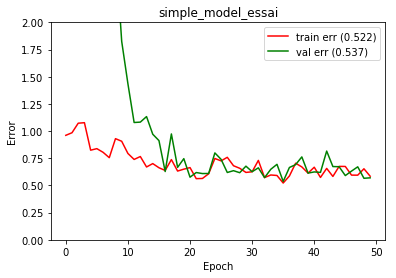

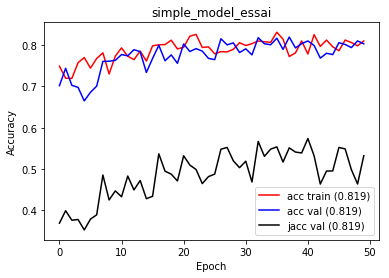

In [7]:
plot('simple_model_essai', LOADPATH)

n_epochs = 110
TRAIN: 0.192251121004
VALID: 0.228777077226


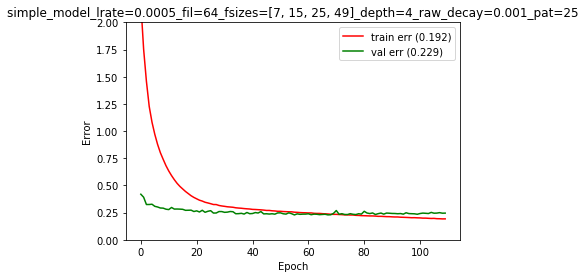

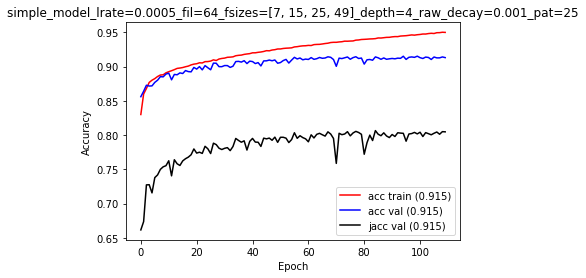

In [9]:
plot('simple_model_lrate=0.0005_fil=64_fsizes=[7, 15, 25, 49]_depth=4_raw_decay=0.001_pat=25', LOADPATH)